In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system
import graphviz
from pyramid.arima import auto_arima



C:\Anaconda\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
filename = "./data/Chicago_Crimes_2001_Current.csv"
tp = pd.read_csv(filename, index_col='Date', header=0, iterator=True, chunksize=10000)
input_data = pd.concat(tp) 
input_data1 = pd.DataFrame(input_data)

In [3]:
input_data1.index

Index(['03/18/2015 07:44:00 PM', '03/18/2015 11:00:00 PM',
       '03/18/2015 10:45:00 PM', '03/18/2015 10:30:00 PM',
       '03/18/2015 09:00:00 PM', '03/18/2015 10:00:00 PM',
       '03/18/2015 11:00:00 PM', '03/18/2015 09:35:00 PM',
       '03/18/2015 10:09:00 PM', '03/18/2015 09:25:00 PM',
       ...
       '11/18/2018 12:00:00 PM', '11/17/2018 10:00:00 PM',
       '11/19/2018 11:55:00 AM', '11/19/2018 03:00:00 PM',
       '11/08/2018 09:00:00 AM', '11/19/2018 04:04:00 PM',
       '11/19/2018 04:04:00 PM', '11/19/2018 04:04:00 PM',
       '11/19/2018 09:58:00 PM', '11/19/2018 09:25:00 PM'],
      dtype='object', name='Date', length=6752229)

In [4]:
input_data1.index = pd.to_datetime(input_data1.index)

In [5]:
theft = pd.DataFrame(input_data1[input_data1['Primary Type'].isin(['THEFT'])]['Primary Type'])
theft.head(10)

,Primary Type
Date,
2015-03-18 22:31:00,THEFT
2015-03-18 21:00:00,THEFT
2015-03-18 22:45:00,THEFT
2015-03-18 22:00:00,THEFT
2015-03-18 22:30:00,THEFT
2015-03-19 02:00:00,THEFT
2015-03-18 20:00:00,THEFT
2015-03-17 12:00:00,THEFT
2015-03-17 19:30:00,THEFT


In [6]:
grouper = theft.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [7]:
grouper.head()

,Primary Type
Date,
2015-03-18 22:31:00,THEFT
2015-03-18 21:00:00,THEFT
2015-03-18 22:45:00,THEFT
2015-03-18 22:00:00,THEFT
2015-03-18 22:30:00,THEFT
2002-01-23 00:00:00,THEFT
2015-02-01 13:00:00,THEFT
2015-02-28 20:00:00,THEFT
2015-01-11 10:00:00,THEFT


In [8]:
data = grouper['Primary Type'].count().unstack()

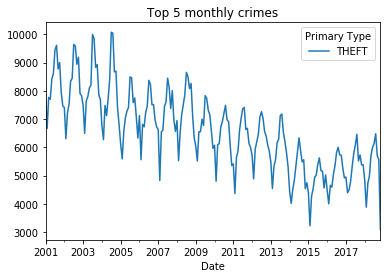

In [9]:
import matplotlib.pyplot as plt
data.plot()
plt.title("Top 5 monthly crimes")
plt.show()

In [10]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

'https://plot.ly/~readabhishek/4'

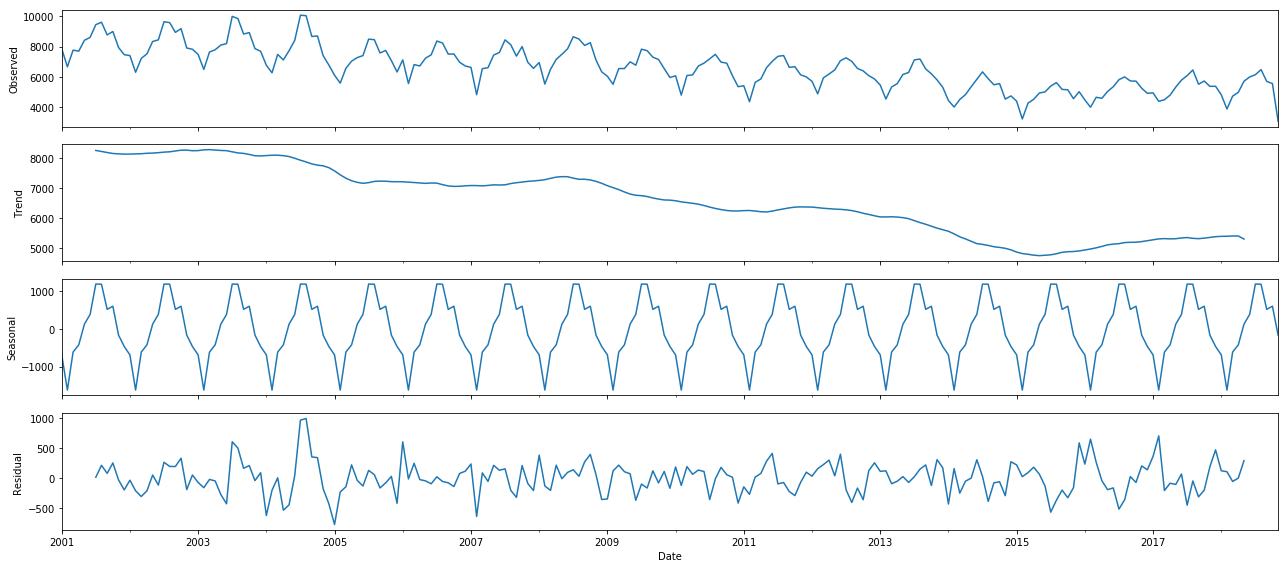

In [11]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2932.128, BIC=2948.670, Fit time=0.962 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=3005.601, BIC=3012.217, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2967.076, BIC=2980.310, Fit time=0.426 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2933.224, BIC=2946.457, Fit time=0.594 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2930.960, BIC=2950.810, Fit time=1.846 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2961.382, BIC=2977.924, Fit time=0.986 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2932.236, BIC=2955.394, Fit time=3.916 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2980.635, BIC=2993.868, Fit time=0.260 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2935.027, BIC=2961.493, Fit time=4.720 seconds
Fit ARIMA: order=(0, 1, 1) s

In [13]:
train = data.loc[:'2015-12-01']
test = data.loc['2016-01-01':]


In [14]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [17]:
future_forecast = stepwise_model.predict(n_periods=35)

In [18]:
import plotly
import plotly.tools as tls
import cufflinks
plotly.tools.set_credentials_file(username='readabhishek', api_key='ZubDsJKijPuGsknG3Edg')
tls.embed("https://plot.ly/~cufflinks/8")
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

pd.concat([test,future_forecast],axis=1).iplot()
pd.concat([data,future_forecast],axis=1).iplot()